In [1]:
# IMPORTING THE REQUIRED LIBRARIES  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,average_precision_score,precision_recall_curve,roc_curve,auc
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pickle

EXPLORATORY DATA ANALYSIS 

In [2]:
# IMPORTING THE DATASET
df = pd.read_csv('../Dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Exploring the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Checking for Null Values
df.isnull().sum().max()

0

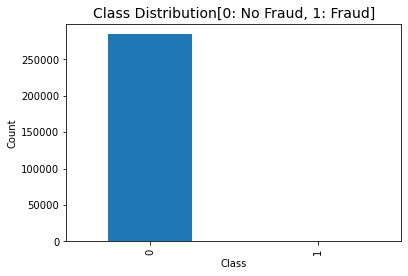

Number of Fraud Cases:  492
Number of Non-Fraud Cases:  284315


In [5]:
# Plottting the Class Distribution
df.Class.value_counts().plot(kind='bar')
plt.title('Class Distribution[0: No Fraud, 1: Fraud]', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
y=[df['Class'].value_counts()[0],df['Class'].value_counts()[1]]
print("Number of Fraud Cases: ",y[1])
print("Number of Non-Fraud Cases: ",y[0])


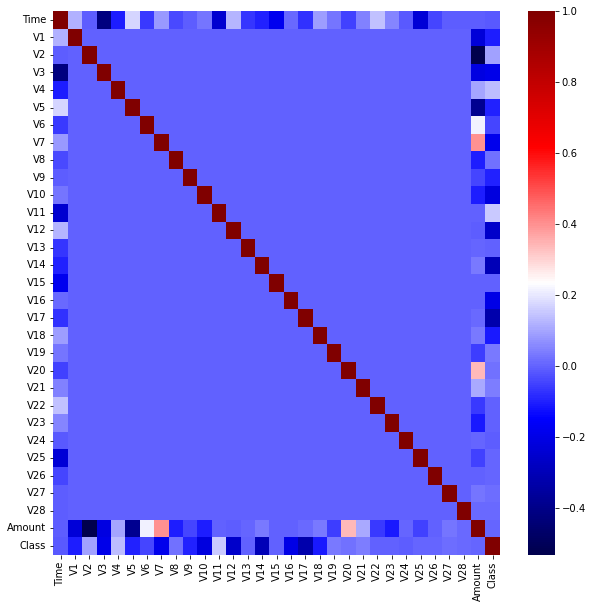

In [6]:
# Plot the Correlation Matrix 
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show()


(0.0, 0.005)

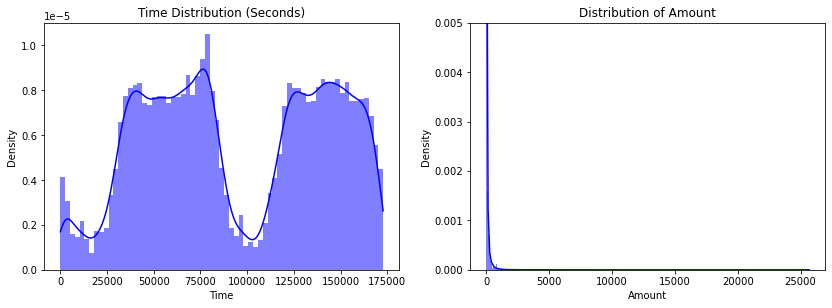

In [7]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.histplot(df['Time'], color='blue', kde=True, stat="density", linewidth=0)

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.histplot(df['Amount'],color='blue', kde=True, stat="density", linewidth=0)
plt.ylim(0, 0.0050)

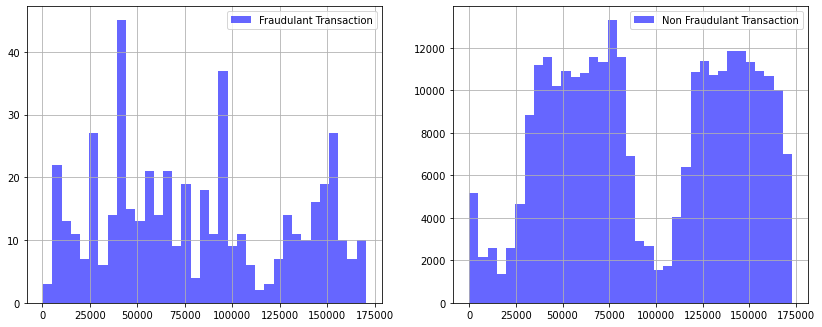

In [8]:
# Plot histogram of Time with respect to Class
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By doing the EDA we found out the following important points : 
1. There are no NaN values in the Dataset.
2. All the features except Time and Amount are already Normalized.
3. The Dataset is highly inbalanced.
4. Time doesn't make much of an impact in Fraud vs Non Fraud classification

PRE-PROCESSING + OVERSAMPLING

The pre-processing will include dropping the Time Coloumn , applying Standard Scaling to the Amount Coloumn and splitting the data into training and testing set before applying SMOTE Transformation to them.

In [9]:
# Making the Pre-Processor
ss = StandardScaler()
preprocess = ColumnTransformer(transformers=[('Time_drp','drop',['Time']),('Standard_Scaler',ss, ['Amount'])],remainder='passthrough')

In [10]:
# Splitting the data into train and test
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


In [11]:
# Oversampling the Minority Class using SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 

After OverSampling, the shape of train_X: (454902, 29)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


c:\Users\ritod\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


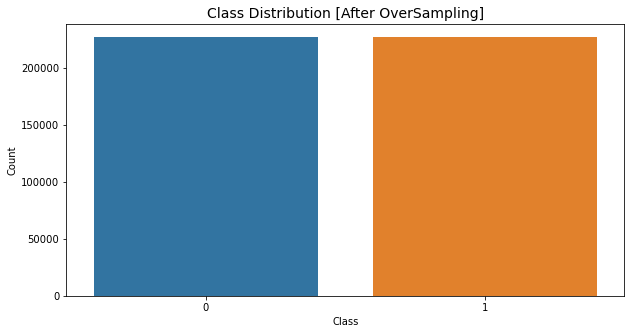

In [12]:
# Plot the Class Distribution
plt.figure(figsize=(10,5))
sns.countplot(y_train_res)
plt.title('Class Distribution [After OverSampling]', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

BASELINE MODEL

In [13]:
# Making a baseline model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)


In [14]:
# Calculating the recall and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



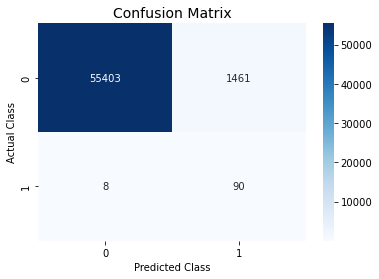

In [15]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

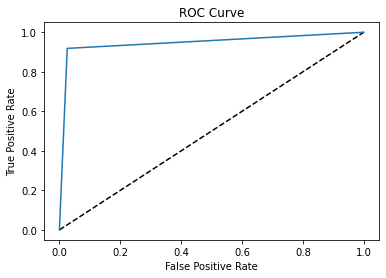

In [16]:
#Plot ROCCURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
# AUC
roc_auc = auc(fpr, tpr)
roc_auc

0.946337232839112

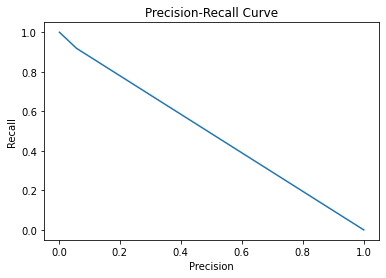

In [18]:
# Plot the Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall, label='Logistic Regression')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()

In [19]:
# Area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.05


The Precision and Recall / F1 scores depict a very poor perfomance . The high accuracy is due to imbalanced data set and cannot be used as an appropriate metric for evaluating perfomance

ARTIFICIAL NEURAL NETWORK MODEL

In [20]:
# Making a Neural Network
n_inputs = X_train_res.shape[1]
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.33),
    BatchNormalization(),
    Dense(2, activation='softmax')
])
callback = EarlyStopping(monitor='val_loss',patience=3)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 2,024
Trainable params: 1,960
Non-trainable params: 64
_________________________________________________________________


In [21]:
#Fitting the Model
model.fit(X_train_res, y_train_res, validation_split=0.2,epochs=30, batch_size=350,verbose=1,callbacks=[callback])

Epoch 1/30
1040/1040 [==============================] - 6s 5ms/step - loss: 0.0943 - accuracy: 0.9659 - val_loss: 0.0337 - val_accuracy: 0.9877
Epoch 2/30
1040/1040 [==============================] - 4s 4ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 3/30
1040/1040 [==============================] - 4s 3ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0056 - val_accuracy: 0.9999
Epoch 4/30
1040/1040 [==============================] - 4s 4ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/30
1040/1040 [==============================] - 4s 4ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/30
1040/1040 [==============================] - 3s 3ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 7/30
1040/1040 [==============================] - 4s 4ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0029 - val_accuracy:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.83      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.91      0.84     56962
weighted avg       1.00      1.00      1.00     56962



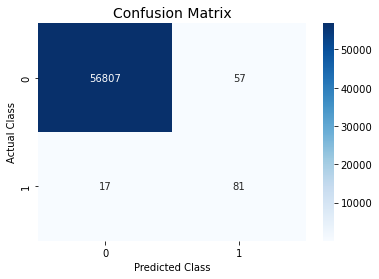

In [22]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


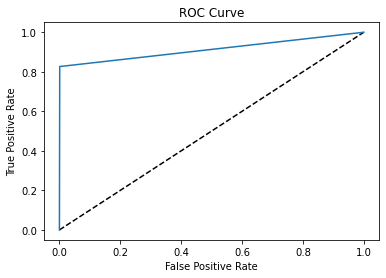

In [23]:
# Plot ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [24]:
#AUC 
roc_auc = auc(fpr, tpr)
roc_auc

0.9127641102867708

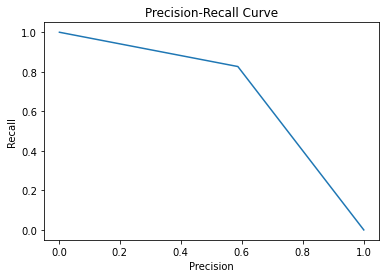

In [25]:
# Plot the Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall, label='Logistic Regression')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()

In [26]:
# Area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.49


The ANN model shows significant improvement over our baseline model.

SAVING THE MODEL AND PREPROCESSING OBJECT FOR FUTURE USE(OPTIONAL)

In [27]:
# Saving the model
model.save('model.h5')

In [28]:
# Saving the PreProcessing Object
pickle.dump(preprocess, open('preprocess.pkl', 'wb'),protocol=pickle.HIGHEST_PROTOCOL)